# Machine Learning I (CC2008) - Practical Assignment

---
Trabalho realizado por:

* João Raposo - up202210331
* Rodrigo Coelho -
* Catarina Aguiar -

---

## Índice


## Introdução

De modo a podermos testar o nosso algoritmo, teremos de tratar os datasets que vamos utilizar. Vamos então analisar na integra os mesmos para averiguar o tipo de dados de cada um, verificar se tem valores nulos, analisar a classe alvo, verificar se há classes desbalanceadas e, por fim, gerar uma representação gráfica dos dados.

### Bibliotecas necessárias

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math

### Alterar definições para que os outputs não saiam truncados

In [197]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Análise dos Datasets

### Dataset_311_oil_splill

**1. Leitura do dataset**

In [198]:
# Leitura do dataset
df_oil = pd.read_csv("untreatedDatasets/dataset_311_oil_spill.csv")

# Visualização de parte dos dados
df_oil.head()

attr1    attr2    attr3   attr4  attr5       attr6  attr7  attr8    attr9  \
0    1.0   2558.0  1506.09  456.63     90   6395000.0  40.88   7.89  29780.0   
1    2.0  22325.0    79.11  841.03    180  55812500.0  51.11   1.21  61900.0   
2    3.0    115.0  1449.85  608.43     88    287500.0  40.42   7.34   3340.0   
3    4.0   1201.0  1562.53  295.65     66   3002500.0  42.40   7.97  18030.0   
4    5.0    312.0   950.27  440.86     37    780000.0  41.43   7.03   3350.0   

   attr10  attr11  attr12  attr13  attr14  attr15  attr16   attr17   attr18  \
0    0.19   214.7    0.21    0.26    0.49    0.10    0.40    99.59    32.19   
1    0.02   901.7    0.02    0.03    0.11    0.01    0.11  6058.23  4061.15   
2    0.18    86.1    0.21    0.32    0.50    0.17    0.34    71.20    16.73   
3    0.19   166.5    0.21    0.26    0.48    0.10    0.38   120.22    33.47   
4    0.17   232.8    0.15    0.19    0.35    0.09    0.26   289.19    48.68   

   attr19  attr20  attr21  attr22  attr23  attr24  attr25  attr26  attr27  \
0    1.84    0.16    0.20   87.65       0    0.47  132.78   -0.01    3.78   
1    2.30    0.02    0.02   87.65       0    0.58  132.78   -0.01    3.78   
2    1.82    0.19    0.29   87.65       0    0.46  132.78   -0.01    3.78   
3    1.91    0.16    0.21   87.65       0    0.48  132.78   -0.01    3.78   
4    1.86    0.13    0.16   87.65       0    0.47  132.78   -0.01    3.78   

   attr28  attr29  attr30  attr31  attr32  attr33  attr34  attr35   attr36  \
0    0.22    3.20   -3.71   -0.18    2.19     0.0    2.19   310.0  16110.0   
1    0.84    7.09   -2.21    0.00    0.00     0.0    0.00   704.0  40140.0   
2    0.70    4.79   -3.36   -0.23    1.95     0.0    1.95    29.0   1530.0   
3    0.84    6.78   -3.54   -0.33    2.20     0.0    2.20   183.0  10080.0   
4    0.02    2.28   -3.44   -0.44    2.19     0.0    2.19    45.0   2340.0   

   attr37  attr38  attr39  attr40   attr41    attr42   attr43   attr44  \
0    0.00  138.68      89      69  2850.00   1000.00   763.16   135.46   
1    0.00   68.65      89      69  5750.00  11500.00  9593.48  1648.80   
2    0.01   38.80      89      69  1400.00    250.00   150.00    45.13   
3    0.00  108.27      89      69  6041.52    761.58   453.21   144.97   
4    0.00   14.39      89      69  1320.04    710.63   512.54   109.16   

   attr45  attr46    attr47  attr48  attr49  class  
0    3.73       0  33243.19   65.74    7.95      1  
1    0.60       0  51572.04   65.73    6.26     -1  
2    9.33       1  31692.84   65.81    7.84      1  
3   13.33       1  37696.21   65.67    8.07      1  
4    2.58       0  29038.17   65.66    7.35     -1

Percebemos então que o dataset tem 49 atributos e que "class" é a classe alvo.

**2. Tipo de dados**

In [199]:
print(df_oil.dtypes)

attr1     float64
attr2     float64
attr3     float64
attr4     float64
attr5       int64
attr6     float64
attr7     float64
attr8     float64
attr9     float64
attr10    float64
attr11    float64
attr12    float64
attr13    float64
attr14    float64
attr15    float64
attr16    float64
attr17    float64
attr18    float64
attr19    float64
attr20    float64
attr21    float64
attr22    float64
attr23      int64
attr24    float64
attr25    float64
attr26    float64
attr27    float64
attr28    float64
attr29    float64
attr30    float64
attr31    float64
attr32    float64
attr33    float64
attr34    float64
attr35    float64
attr36    float64
attr37    float64
attr38    float64
attr39      int64
attr40      int64
attr41    float64
attr42    float64
attr43    float64
attr44    float64
attr45    float64
attr46      int64
attr47    float64
attr48    float64
attr49    float64
class       int64
dtype: object


**3. Valores nulos**

In [200]:
print(df_oil.isnull().sum())

attr1     0
attr2     0
attr3     0
attr4     0
attr5     0
attr6     0
attr7     0
attr8     0
attr9     0
attr10    0
attr11    0
attr12    0
attr13    0
attr14    0
attr15    0
attr16    0
attr17    0
attr18    0
attr19    0
attr20    0
attr21    0
attr22    0
attr23    0
attr24    0
attr25    0
attr26    0
attr27    0
attr28    0
attr29    0
attr30    0
attr31    0
attr32    0
attr33    0
attr34    0
attr35    0
attr36    0
attr37    0
attr38    0
attr39    0
attr40    0
attr41    0
attr42    0
attr43    0
attr44    0
attr45    0
attr46    0
attr47    0
attr48    0
attr49    0
class     0
dtype: int64


Neste dataset não há valores nulos e, como tal, não será necessário tratar os dados neste sentido.

**4. Análise da classe alvo**

Primeiramente vamos normalizar o nome da coluna alvo para CLASS, apresentar os valores únicos, contabilizar o número de instâncias e respetivas percentagens de cada classe e, por fim, visualizar a distribuição num gráfico circular.

Valores únicos em CLASS: [ 1 -1]

Resumo da distribuição de classes:
        Contagem  Percentagem (%)
CLASS                           
-1          896             95.6
 1           41              4.4


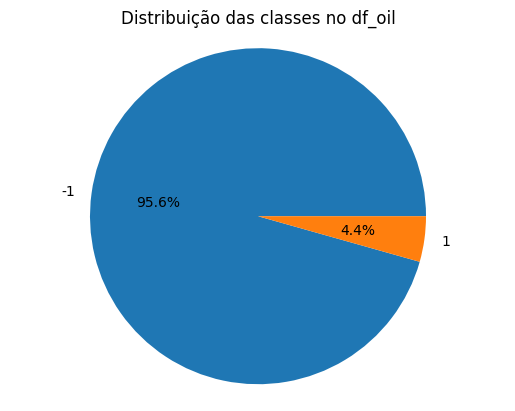

In [201]:
# Normalizar o nome da coluna alvo para "CLASS"
orig_class = next(c for c in df_oil.columns if c == 'class')
df_oil = df_oil.rename(columns={orig_class: 'CLASS'})

# Mostrar os valores únicos em CLASS
print('Valores únicos em CLASS:', df_oil['CLASS'].unique())

# Contabilizar o número de instâncias de cada classe
counts = df_oil['CLASS'].value_counts()
percent = df_oil['CLASS'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Contagem': counts,
    'Percentagem (%)': percent.round(1)
})
print('\nResumo da distribuição de classes:\n', summary)

# Visualizar a distribuição em gráfico circular
plt.figure()
plt.pie(
    counts.values,
    labels=[str(c) for c in counts.index],
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.title('Distribuição das classes no df_oil')
plt.show()

Com isto, concluímos que os este dataset contém classes desbalanceadas, contendo 95.6% do tipo '-1' e 4.4% do tipo '1'.

**5. Visualização dos dados**



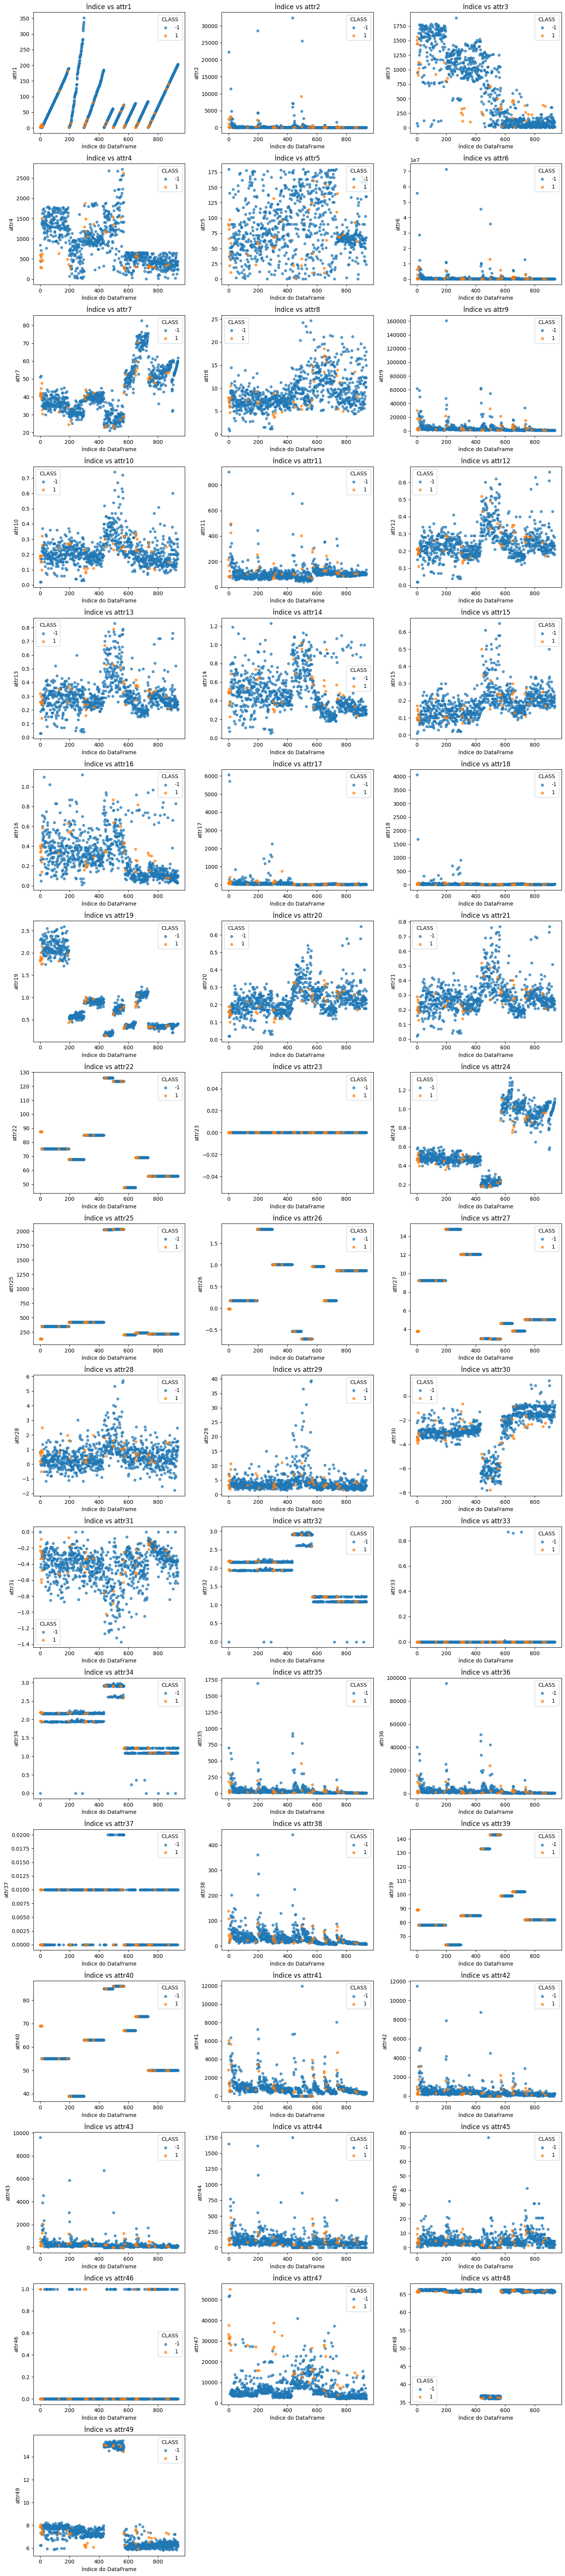

In [202]:
class_col    = 'CLASS'
feature_cols = [c for c in df_oil.columns if c != class_col]

# Definir layout da grelha
n    = len(feature_cols)
cols = 3                                  # 3 gráficos por linha
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Criar um scatter plot por feature
for ax, feat in zip(axes, feature_cols):
    for cls in sorted(df_oil[class_col].unique()):
        subset = df_oil[df_oil[class_col] == cls]
        ax.scatter(subset.index, subset[feat],
                   label=str(cls), alpha=0.7, s=20)
    ax.set_xlabel('Índice do DataFrame')
    ax.set_ylabel(feat)
    ax.set_title(f'Índice vs {feat}')
    ax.legend(title='CLASS')

# Remover eixos vazios
for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### Dataset_767_analcatdata_apnea1

**1. Leitura do dataset**

In [203]:
# Leitura do dataset
df_apnea = pd.read_csv("untreatedDatasets/dataset_767_analcatdata_apnea1.csv")

# Visualização de parte dos dados
df_apnea.head()

Scorer_1 Scorer_2  Subject binaryClass
0        N        N        1           N
1        H        N        1           P
2       OA        N        1           P
3       MA        N        1           P
4       CA        N        1           N

**2. Tipos de Dados**

In [204]:
print(df_apnea.dtypes)

Scorer_1       object
Scorer_2       object
Subject         int64
binaryClass    object
dtype: object


Vamos converter os atributos do tipo objeto para valores numéricos.

In [205]:
# Converter colunas de string para numéricas
obj_cols = df_apnea.select_dtypes(include='object').columns
for col in obj_cols:
    df_apnea[col] = pd.factorize(df_apnea[col])[0]

# Verificar tipos após conversão
print('\nTipos após conversão:')
print(df_apnea.dtypes)

print("\nDados normalizados:")

df_apnea.head()


Tipos após conversão:
Scorer_1       int64
Scorer_2       int64
Subject        int64
binaryClass    int64
dtype: object

Dados normalizados:


Scorer_1  Scorer_2  Subject  binaryClass
0         0         0        1            0
1         1         0        1            1
2         2         0        1            1
3         3         0        1            1
4         4         0        1            0

**3. Valores Nulos**

In [206]:
print(df_apnea.isnull().sum())

Scorer_1       0
Scorer_2       0
Subject        0
binaryClass    0
dtype: int64


**4. Análise da classe alvo**

Valores únicos em CLASS: [0 1]

Resumo da distribuição de classes:
        Contagem  Percentagem (%)
CLASS                           
1           414             87.2
0            61             12.8


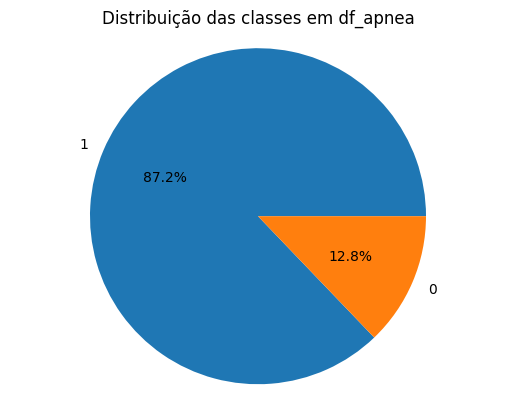

In [207]:
# Normalizar o nome da coluna alvo para "CLASS"
orig_class = df_apnea.columns[-1]
df_apnea = df_apnea.rename(columns={orig_class: 'CLASS'})

# Mostrar os valores únicos em CLASS
print('Valores únicos em CLASS:', df_apnea['CLASS'].unique())

# Contabilizar o número de instâncias de cada classe
counts  = df_apnea['CLASS'].value_counts()
percent = df_apnea['CLASS'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Contagem':        counts,
    'Percentagem (%)': percent.round(1)
})
print('\nResumo da distribuição de classes:\n', summary)

# Visualizar a distribuição em gráfico circular
plt.figure()
plt.pie(
    counts.values,
    labels=[str(c) for c in counts.index],
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.title('Distribuição das classes em df_apnea')
plt.show()

**5. Visualização dos dados**

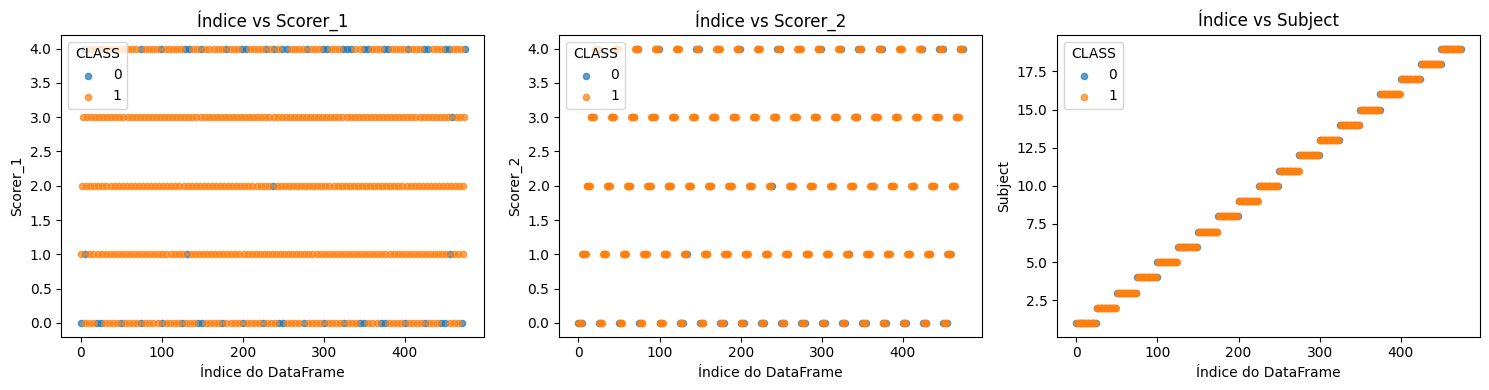

In [208]:
# Visualização dos dados em df_apnea
class_col    = 'CLASS'
feature_cols = [c for c in df_apnea.columns if c != class_col]

# Definir layout da grelha
n    = len(feature_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Criar um scatter plot por feature
for ax, feat in zip(axes, feature_cols):
    for cls in sorted(df_apnea[class_col].unique()):
        subset = df_apnea[df_apnea[class_col] == cls]
        ax.scatter(subset.index, subset[feat],
                   label=str(cls), alpha=0.7, s=20)
    ax.set_xlabel('Índice do DataFrame')
    ax.set_ylabel(feat)
    ax.set_title(f'Índice vs {feat}')
    ax.legend(title='CLASS')

# Remover eixos vazios
for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### Dataset_947_arsenic-male-bladder

**1. Leitura do dataset**

In [209]:
# Leitura do dataset
df_bladder = pd.read_csv("untreatedDatasets/dataset_947_arsenic-male-bladder.csv")

# Visualização de parte dos dados
df_bladder.head()

group  conc   age    at.risk binaryClass
0      1   0.0  22.5  2956638.0           N
1      1   0.0  27.5  2175046.0           N
2      1   0.0  32.5  1580019.0           N
3      1   0.0  37.5  1320637.0           N
4      1   0.0  42.5  1327866.0           N

**2. Tipo de Dados**

In [210]:
print(df_bladder.dtypes)

group            int64
conc           float64
age            float64
at.risk        float64
binaryClass     object
dtype: object


**3. Valores nulos**

In [211]:
print(df_bladder.isnull().sum())

group          0
conc           0
age            0
at.risk        0
binaryClass    0
dtype: int64


**4. Análise da Classe Alvo**

In [212]:
# Normalizar o nome da coluna alvo para "CLASS"
orig_class = df_bladder.columns[-1]
df_bladder = df_bladder.rename(columns={orig_class: 'CLASS'})

# Normalizar os valores da coluna CLASS
df_bladder['CLASS'] = df_bladder['CLASS'].map({'N': 0, 'P': 1})

Valores únicos em CLASS: [0 1]

Resumo da distribuição de classes:
        Contagem  Percentagem (%)
CLASS                           
1           535             95.7
0            24              4.3


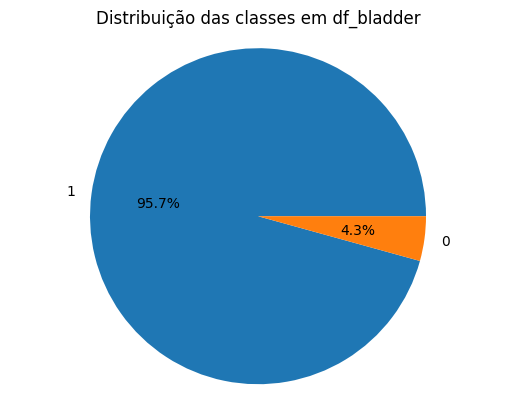

In [213]:
# Mostrar os valores únicos em CLASS
print('Valores únicos em CLASS:', df_bladder['CLASS'].unique())

# Contabilizar o número de instâncias de cada classe
counts  = df_bladder['CLASS'].value_counts()
percent = df_bladder['CLASS'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Contagem':        counts,
    'Percentagem (%)': percent.round(1)
})
print('\nResumo da distribuição de classes:\n', summary)

# Visualizar a distribuição em gráfico circular
plt.figure()
plt.pie(
    counts.values,
    labels=[str(c) for c in counts.index],
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.title('Distribuição das classes em df_bladder')
plt.show()

**5. Visualização dos dados**

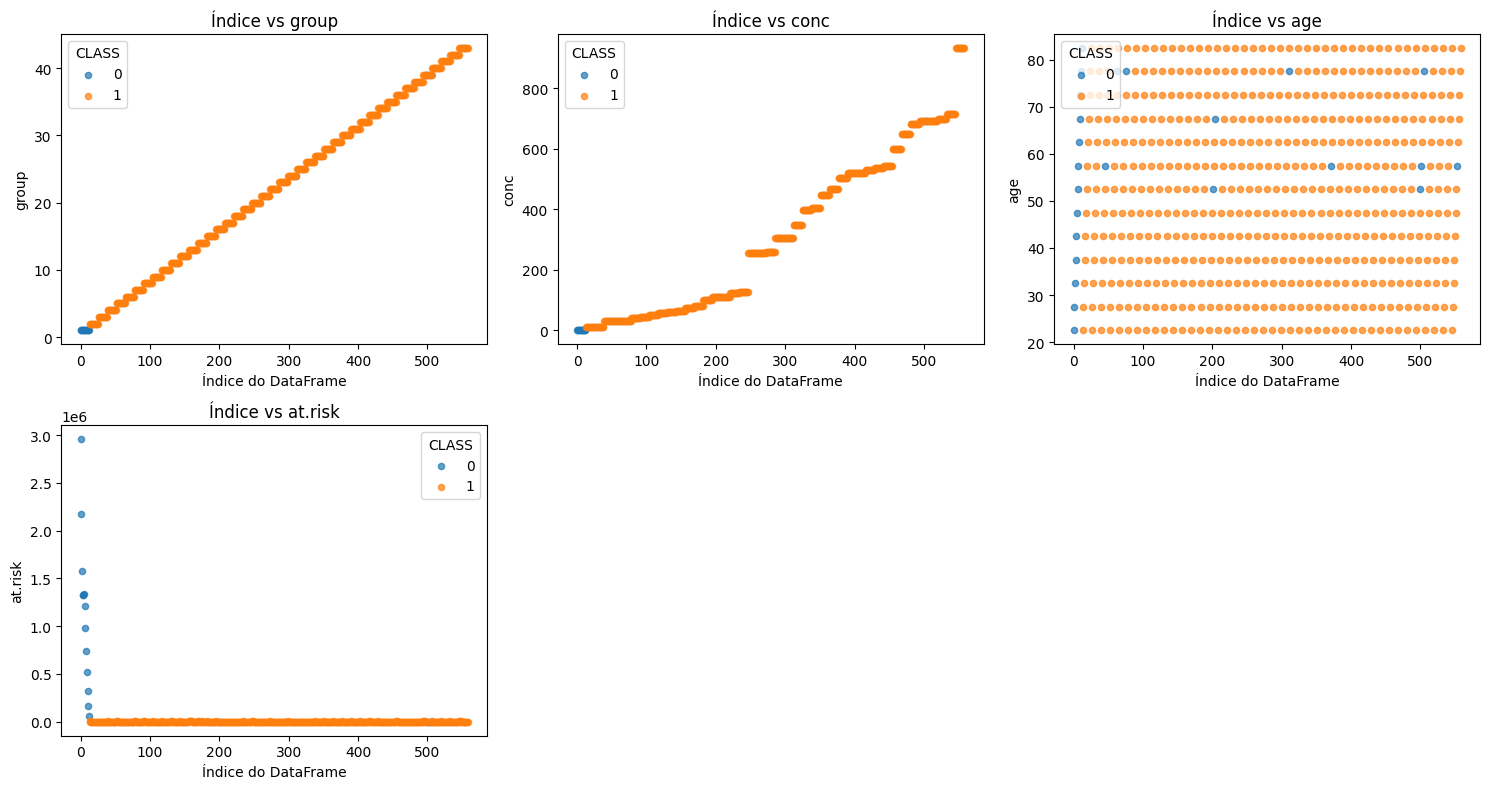

In [214]:
# Visualização dos dados em df_bladder
class_col    = 'CLASS'
feature_cols = [c for c in df_bladder.columns if c != class_col]

# Definir layout da grelha
n    = len(feature_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Criar um scatter plot por feature
for ax, feat in zip(axes, feature_cols):
    for cls in sorted(df_bladder[class_col].unique()):
        subset = df_bladder[df_bladder[class_col] == cls]
        ax.scatter(subset.index, subset[feat],
                   label=str(cls), alpha=0.7, s=20)
    ax.set_xlabel('Índice do DataFrame')
    ax.set_ylabel(feat)
    ax.set_title(f'Índice vs {feat}')
    ax.legend(title='CLASS')

# Remover eixos vazios
for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### Dataset_1004_synthetic_control

**1. Leitura do dataset**

In [215]:
# Leitura do dataset
df_synthetic = pd.read_csv("untreatedDatasets/dataset_1004_synthetic_control.csv")

# Visualização de parte dos dados
df_synthetic.head()

col_1    col_2    col_3    col_4    col_5    col_6    col_7    col_8  \
0  28.7812  34.4632  31.3381  31.2834  28.9207  33.7596  25.3969  27.7849   
1  24.8923  25.7410  27.5532  32.8217  27.8789  31.5926  31.4861  35.5469   
2  31.3987  30.6316  26.3983  24.2905  27.8613  28.5491  24.9717  32.4358   
3  25.7740  30.5262  35.4209  25.6033  27.9700  25.2702  28.1320  29.4268   
4  27.1798  29.2498  33.6928  25.6264  24.6555  28.9446  35.7980  34.9446   

     col_9   col_10   col_11   col_12   col_13   col_14   col_15   col_16  \
0  35.2479  27.1159  32.8717  29.2171  36.0253  32.3370  34.5249  32.8717   
1  27.9516  31.6595  27.5415  31.1887  27.4867  31.3910  27.8110  24.4880   
2  25.2239  27.3068  31.8387  27.2587  28.2572  26.5819  24.0455  35.0625   
3  31.4549  27.3200  28.9564  28.9916  29.9578  30.2773  30.4447  24.3037   
4  24.5596  34.2366  27.9634  25.3216  35.4154  34.8620  25.1472  29.4686   

    col_17   col_18   col_19   col_20   col_21   col_22   col_23   col_24  \
0  34.1173  26.5235  27.6623  26.3693  25.7744  29.2700  30.7326  29.5054   
1  27.5918  35.6273  35.4102  31.4167  30.7447  24.1311  35.1422  30.4719   
2  31.5717  32.5614  31.0308  34.1202  26.9337  31.4781  35.0173  32.3851   
3  24.3140  35.0966  25.3679  32.0968  33.3303  25.0102  35.3155  31.6264   
4  33.1739  31.1274  31.3701  26.5173  28.6486  31.6565  35.9497  33.0321   

    col_25   col_26   col_27   col_28   col_29   col_30   col_31   col_32  \
0  33.0292  25.0400  28.9167  24.3437  26.1203  34.9424  25.0293  26.6311   
1  31.9874  33.6615  25.5511  30.4686  33.6472  25.0701  34.0765  32.5981   
2  24.3323  30.2001  31.2452  26.6814  31.5137  28.8778  27.3086  24.2460   
3  29.2806  34.2021  26.5077  32.2279  25.5265  24.8240  27.5587  28.3714   
4  24.6081  33.2025  27.4335  32.6355  35.8773  28.0295  33.1247  33.4129   

    col_33   col_34   col_35   col_36   col_37   col_38   col_39   col_40  \
0  35.6541  28.4353  29.1495  28.1584  26.1927  33.3182  30.9772  27.0443   
1  28.3038  26.1471  26.9414  31.5203  33.1089  24.1491  28.5157  25.7906   
2  26.9631  25.2919  31.6114  24.7131  27.4809  24.2075  26.8059  35.1253   
3  32.3667  26.9752  35.9346  35.1146  24.3749  27.6083  27.8433  29.8557   
4  26.9245  30.2123  29.6526  30.8644  24.5119  33.9931  33.3094  33.2040   

    col_41   col_42   col_43   col_44   col_45   col_46   col_47   col_48  \
0  35.5344  26.2353  28.9964  32.0036  31.0558  34.2553  28.0721  28.9402   
1  35.9519  26.5301  24.8578  25.9562  32.8357  28.5322  26.3458  30.6213   
2  32.6293  31.0561  26.3583  28.0861  31.4391  27.3057  29.6082  35.9725   
3  32.4185  26.8908  31.3209  29.3849  34.3336  24.7381  35.7690  31.8725   
4  31.2651  27.9072  35.1110  35.0757  33.8330  25.9481  29.1348  24.2875   

    col_49   col_50   col_51   col_52   col_53   col_54   col_55   col_56  \
0  35.4973  29.7470  31.4333  24.5556  33.7431  25.0466  34.9318  34.9879   
1  28.9861  29.4047  32.5577  31.0205  26.6418  28.4331  33.6564  26.4244   
2  34.1444  27.1717  33.6318  26.5966  25.5387  32.5434  25.5772  29.9897   
3  34.2054  31.1560  34.6292  28.7261  28.2979  31.5787  34.6156  32.5492   
4  32.3223  34.9244  27.7218  27.9601  35.7198  27.5760  35.3375  29.9993   

    col_57   col_58   col_59   col_60 binaryClass  
0  32.4721  33.3759  25.4652  25.8717           N  
1  28.4661  34.2484  32.1005  26.6910           N  
2  31.3510  33.9002  29.5446  29.3430           N  
3  30.9827  24.8938  27.3659  25.3069           N  
4  34.2149  33.1276  31.1057  31.0179           N

**2. Tipo de dados**

In [216]:
print(df_synthetic.dtypes)

col_1          float64
col_2          float64
col_3          float64
col_4          float64
col_5          float64
col_6          float64
col_7          float64
col_8          float64
col_9          float64
col_10         float64
col_11         float64
col_12         float64
col_13         float64
col_14         float64
col_15         float64
col_16         float64
col_17         float64
col_18         float64
col_19         float64
col_20         float64
col_21         float64
col_22         float64
col_23         float64
col_24         float64
col_25         float64
col_26         float64
col_27         float64
col_28         float64
col_29         float64
col_30         float64
col_31         float64
col_32         float64
col_33         float64
col_34         float64
col_35         float64
col_36         float64
col_37         float64
col_38         float64
col_39         float64
col_40         float64
col_41         float64
col_42         float64
col_43         float64
col_44     

**3. Valores Nulos**

In [217]:
print(df_synthetic.isnull().sum())

col_1          0
col_2          0
col_3          0
col_4          0
col_5          0
col_6          0
col_7          0
col_8          0
col_9          0
col_10         0
col_11         0
col_12         0
col_13         0
col_14         0
col_15         0
col_16         0
col_17         0
col_18         0
col_19         0
col_20         0
col_21         0
col_22         0
col_23         0
col_24         0
col_25         0
col_26         0
col_27         0
col_28         0
col_29         0
col_30         0
col_31         0
col_32         0
col_33         0
col_34         0
col_35         0
col_36         0
col_37         0
col_38         0
col_39         0
col_40         0
col_41         0
col_42         0
col_43         0
col_44         0
col_45         0
col_46         0
col_47         0
col_48         0
col_49         0
col_50         0
col_51         0
col_52         0
col_53         0
col_54         0
col_55         0
col_56         0
col_57         0
col_58         0
col_59        

**4. Análise da Classe alvo**

In [218]:
# Normalizar o nome da coluna alvo para "CLASS"
orig_class = df_synthetic.columns[-1]
df_synthetic = df_synthetic.rename(columns={orig_class: 'CLASS'})

# Normalizar os valores da coluna CLASS
df_synthetic['CLASS'] = df_synthetic['CLASS'].map({'N': 0, 'P': 1})

Valores únicos em CLASS: [0 1]

Resumo da distribuição de classes:
        Contagem  Percentagem (%)
CLASS                           
0           500             83.3
1           100             16.7


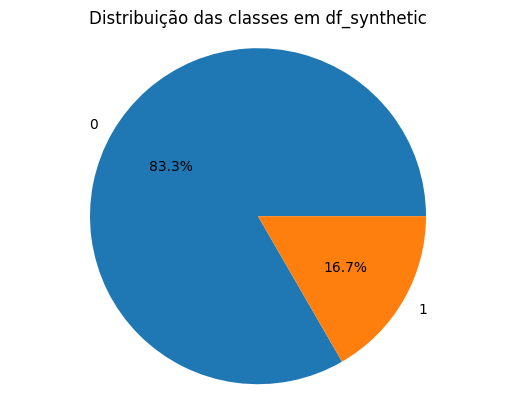

In [219]:
# Mostrar os valores únicos em CLASS
print('Valores únicos em CLASS:', df_synthetic['CLASS'].unique())

# Contabilizar o número de instâncias de cada classe
counts  = df_synthetic['CLASS'].value_counts()
percent = df_synthetic['CLASS'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Contagem':        counts,
    'Percentagem (%)': percent.round(1)
})
print('\nResumo da distribuição de classes:\n', summary)

# Visualizar a distribuição em gráfico circular
plt.figure()
plt.pie(
    counts.values,
    labels=[str(c) for c in counts.index],
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.title('Distribuição das classes em df_synthetic')
plt.show()

**5. Visualização dos dados**

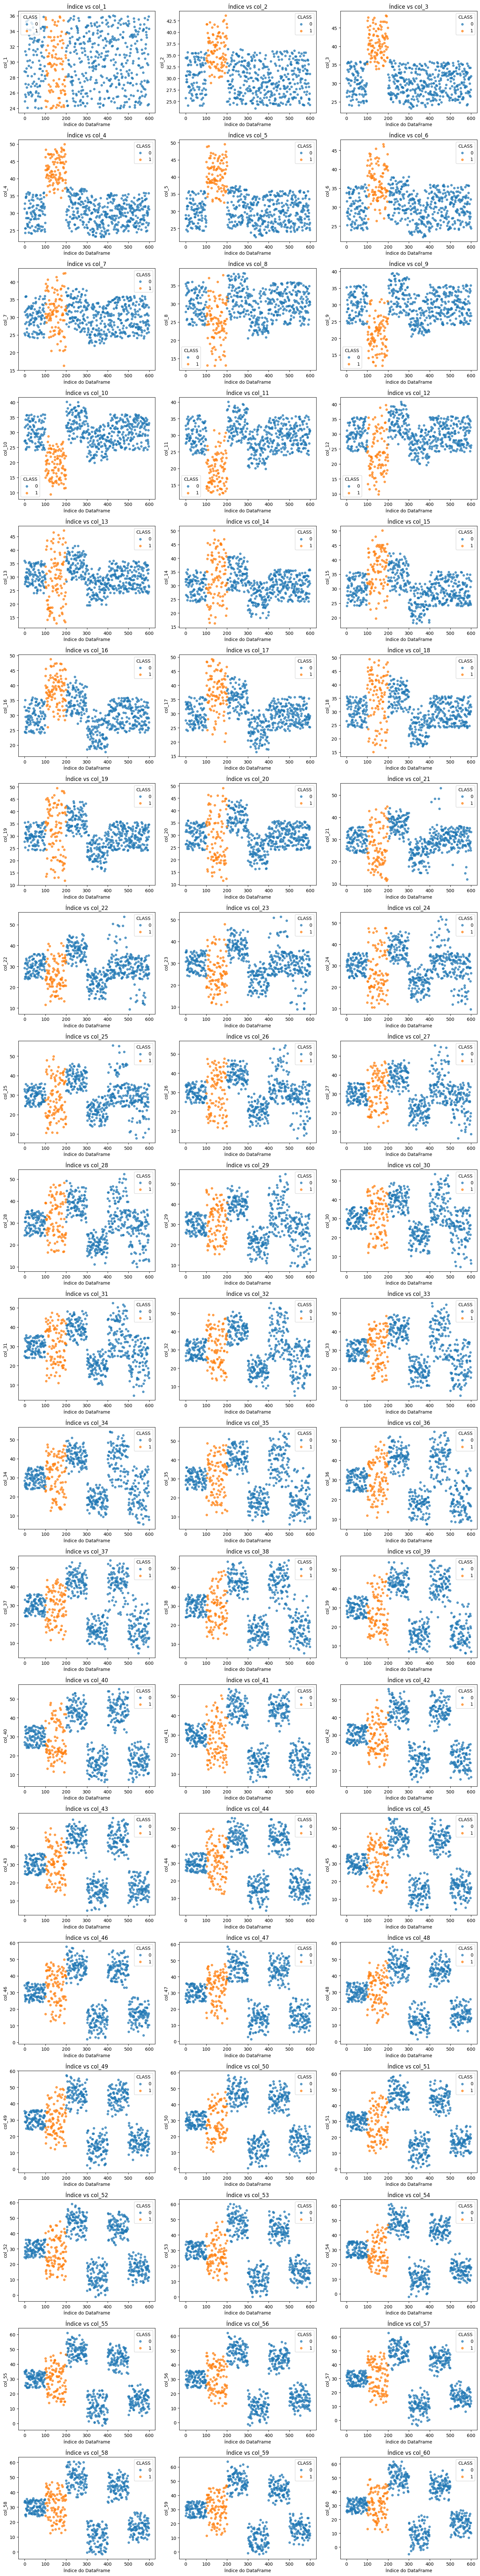

In [220]:
# Visualização dos dados em df_synthetic
class_col    = 'CLASS'
feature_cols = [c for c in df_synthetic.columns if c != class_col]

# Definir layout da grelha
n    = len(feature_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Criar um scatter plot por feature
for ax, feat in zip(axes, feature_cols):
    for cls in sorted(df_synthetic[class_col].unique()):
        subset = df_synthetic[df_synthetic[class_col] == cls]
        ax.scatter(subset.index, subset[feat],
                   label=str(cls), alpha=0.7, s=20)
    ax.set_xlabel('Índice do DataFrame')
    ax.set_ylabel(feat)
    ax.set_title(f'Índice vs {feat}')
    ax.legend(title='CLASS')

# Remover eixos vazios
for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

### Dataset_1014_analcatdata_dmft

**1. Leitura do dataset**

In [221]:
# Leitura do dataset
df_dmtf = pd.read_csv("untreatedDatasets/dataset_1014_analcatdata_dmft.csv")

# Visualização de parte dos dados
df_dmtf.head()

DMFT.Begin  DMFT.End  Gender Ethnic binaryClass
0           6         3    Male  Black           N
1           2         1  Female  Black           N
2           1         0    Male  Black           N
3           7         2    Male  White           N
4           3         3  Female  White           N

**2. Tipos de dados**

In [222]:
print(df_dmtf.dtypes)

DMFT.Begin      int64
DMFT.End        int64
Gender         object
Ethnic         object
binaryClass    object
dtype: object


**3. Valores Nulos**

In [223]:
print(df_dmtf.isnull().sum())

DMFT.Begin     0
DMFT.End       0
Gender         0
Ethnic         0
binaryClass    0
dtype: int64


**4. Análise da Classe Alvo**

In [224]:
# Normalizar o nome da coluna alvo para "CLASS"
orig_class = df_dmtf.columns[-1]
df_dmtf = df_dmtf.rename(columns={orig_class: 'CLASS'})

# Normalizar os valores da coluna CLASS
df_dmtf['CLASS'] = df_dmtf['CLASS'].map({'N': 0, 'P': 1})

Valores únicos em CLASS: [0 1]

Resumo da distribuição de classes:
        Contagem  Percentagem (%)
CLASS                           
0           642             80.6
1           155             19.4


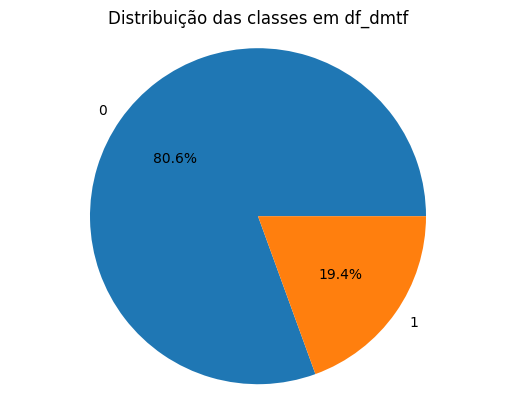

In [225]:
# Mostrar os valores únicos em CLASS
print('Valores únicos em CLASS:', df_dmtf['CLASS'].unique())

# Contabilizar o número de instâncias de cada classe
counts  = df_dmtf['CLASS'].value_counts()
percent = df_dmtf['CLASS'].value_counts(normalize=True) * 100
summary = pd.DataFrame({
    'Contagem':        counts,
    'Percentagem (%)': percent.round(1)
})
print('\nResumo da distribuição de classes:\n', summary)

# Visualizar a distribuição em gráfico circular
plt.figure()
plt.pie(
    counts.values,
    labels=[str(c) for c in counts.index],
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.title('Distribuição das classes em df_dmtf')
plt.show()

**5. Visualização dos dados**

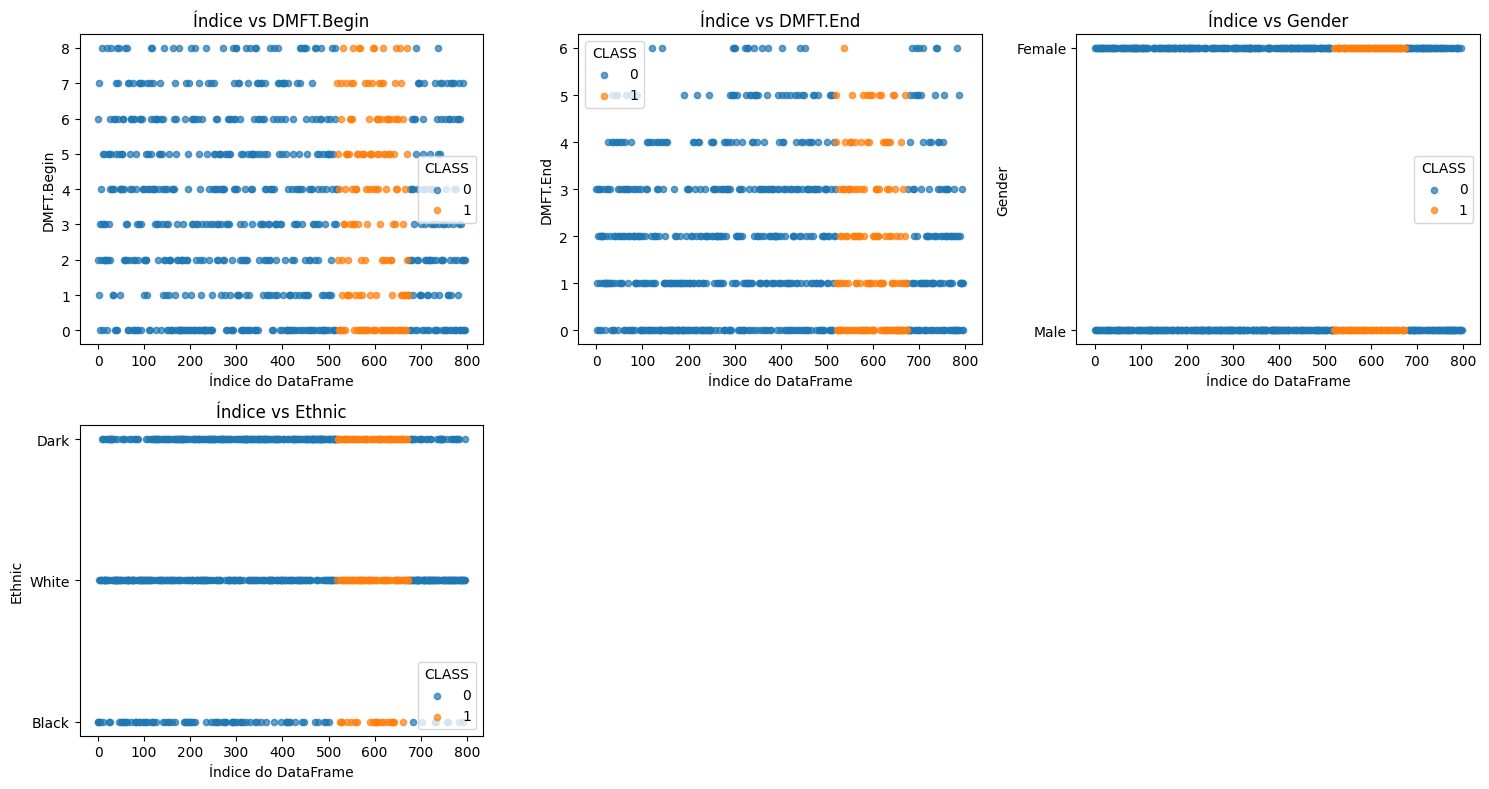

In [226]:
# Visualização dos dados em df_dmtf
class_col    = 'CLASS'
feature_cols = [c for c in df_dmtf.columns if c != class_col]

# Definir layout da grelha
n    = len(feature_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Criar um scatter plot por feature
for ax, feat in zip(axes, feature_cols):
    for cls in sorted(df_dmtf[class_col].unique()):
        subset = df_dmtf[df_dmtf[class_col] == cls]
        ax.scatter(subset.index, subset[feat],
                   label=str(cls), alpha=0.7, s=20)
    ax.set_xlabel('Índice do DataFrame')
    ax.set_ylabel(feat)
    ax.set_title(f'Índice vs {feat}')
    ax.legend(title='CLASS')

# Remover eixos vazios
for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

## Conclusão da limpeza dos dados

Depois desta rápida inspeção aos dataframes selecionados e à resolução das inconsistências, obtivemos tabelas limpas. No entanto, todas apresentam uma distribuição desequilibrada na variável target, o que se configura como o principal desafio a ser enfrentado.

Com isso, só falta exportar os dados tratados para ficheiros .csv, que serão utilizados ao longo do projeto:

In [ ]:
# Após a limpeza e normalização, salvar os DataFrames tratados em arquivos CSV
df_oil.to_csv('cleanDatasets/oil.csv', index=False)
df_apnea.to_csv('cleanDatasets/apnea.csv', index=False)
df_bladder.to_csv('cleanDatasets/bladder.csv', index=False)
df_synthetic.to_csv('cleanDatasets/synthetic.csv', index=False)
df_dmtf.to_csv('cleanDatasets/dmtf.csv', index=False)